# FRE-6971 Final 
### Name : Kohsheen Tiku
### NetID: N11000167

## PART1:

Use Sample A to compute 3 cointegrated butterflies of ED futures rates: [2y,3y,5y], [3y,4y,5y], [2y,3y,4y]. 

Weight on the belly of a butterlfy is 1 for all combinations.

In [350]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen
data = pd.read_csv('./Constant_Maturity_ED.csv', index_col=0, parse_dates=True)


- Butterfly-1: [2y,3y,5y]
- Butterfly-2: [3y,4y,5y]
- Butterfly-3: [2y,3y,4y]

In [351]:
start_date = '2010-01-01'
end_date = '2014-01-01'

sampleA_2y = data.loc[start_date:end_date, 'ED8']
sampleA_3y =  data.loc[start_date:end_date,'ED12']
sampleA_4y =  data.loc[start_date:end_date,'ED16']
sampleA_5y =  data.loc[start_date:end_date,'ED20']

data.shape
sampleA_5y


Date
2010-01-04    5.079051
2010-01-06    5.031583
2010-01-07    5.072992
2010-01-08    5.073866
2010-01-11    5.103546
                ...   
2013-12-24    4.054161
2013-12-26    4.062523
2013-12-27    4.069235
2013-12-30    4.039978
2013-12-31    4.085310
Name: ED20, Length: 998, dtype: float64

## Box-Tiao algorithm

CCA is used to find linear combinations of two sets of variables that are maximally correlated with each other. In this specific case, the goal is to find the weights that produce the best linear combination of the ED futures rates in the butterfly.



In [352]:
import statsmodels.api as sm

def cca_Box_Tiao(df):
    df = df-df.mean()
    df_lag = df.shift().dropna()
    df1 = df.loc[df_lag.index, :]
    model = sm.OLS(df1.values, df_lag.values).fit()
    A = model.params
    cov = df1.cov()
    Q = np.linalg.inv(cov)@ (np.transpose(A)) @ (cov) @ (A)
    val, vec = np.linalg.eig(Q)
    return val, vec

In [353]:
## Butterfly 1 = [2y,3y,5y]
butterfly1_df = pd.concat([sampleA_2y, sampleA_3y, sampleA_5y], axis=1)
butterfly1_df.columns = ['ED8', 'ED12', 'ED20']

## Butterfly 2 = [3y,4y,5y]
butterfly2_df = pd.concat([sampleA_3y, sampleA_4y, sampleA_5y], axis=1)
butterfly2_df.columns = ['ED12', 'ED16', 'ED20']

## Butterfly 3 = [2y,3y,4y]
butterfly3_df = pd.concat([sampleA_2y, sampleA_3y, sampleA_4y], axis=1)
butterfly3_df.columns = ['ED8', 'ED12', 'ED16']



In [354]:
# Compute the Box-Tiao weights for the cointegrated butterfly
def compute_WFLY_weights(df):
  val, vec = cca_Box_Tiao(df)
  eigenvectors = pd.DataFrame(vec)
  eigenvectors = eigenvectors.rename(columns=lambda x: 3-x-1, inplace=False)
  weights = eigenvectors[val.argmax()].values
  WFLY_weights = [weights[0]/weights[1], 1, weights[2]/weights[1]]
  return WFLY_weights

In [355]:
## Butterfly 1 Weights = [2y,3y,5y]
WFLY_weights_1 = compute_WFLY_weights(butterfly1_df)
print(WFLY_weights_1)

## Butterfly 2 Weights = [3y,4y,5y]
WFLY_weights_2 = compute_WFLY_weights(butterfly2_df)
print(WFLY_weights_2)

## Butterfly 3 Weights = [2y,3y,4y]
WFLY_weights_3 = compute_WFLY_weights(butterfly3_df)
print(WFLY_weights_3)

[-0.694750402947456, 1, -0.4588165048345133]
[-0.41812149028245543, 1, -0.6184554531698344]
[-0.5354157483499515, 1, -0.5628997449827322]


The above are the weights obtained for Butterfly 1, 2, 3 using Sample A 

<bound method NDFrame.head of                    0
Date                
2010-01-04 -0.412471
2010-01-06 -0.381477
2010-01-07 -0.383368
2010-01-08 -0.373735
2010-01-11 -0.369375
...              ...
2013-12-24 -0.318538
2013-12-26 -0.328626
2013-12-27 -0.315296
2013-12-30 -0.328623
2013-12-31 -0.332524

[998 rows x 1 columns]>


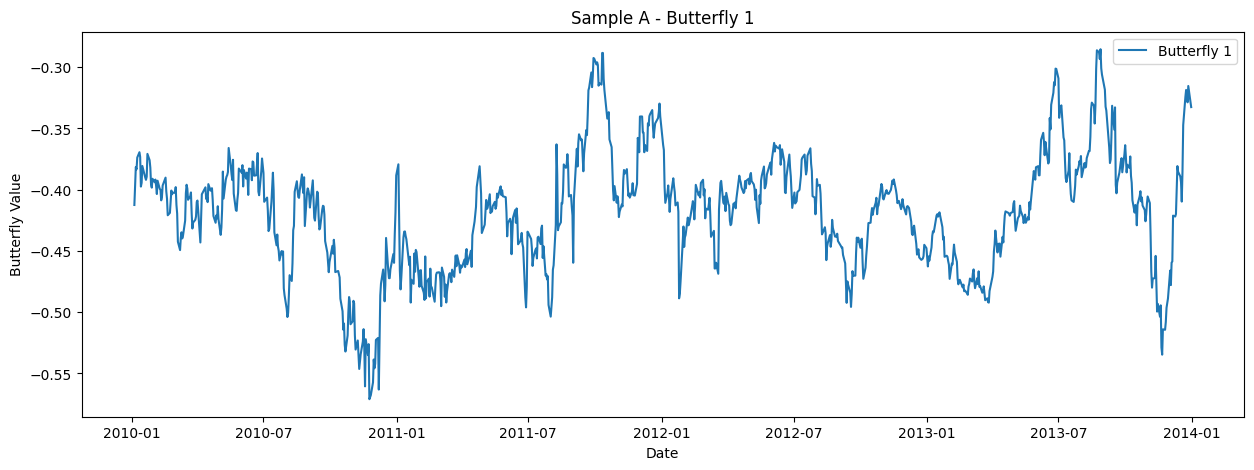

In [356]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
butterfly1_df = pd.DataFrame(sampleA_2y * WFLY_weights_1[0] + sampleA_3y + sampleA_5y * WFLY_weights_1[2])
butterfly1_df.index = sampleA_2y.index.intersection(data.index)  # Align indices
print(butterfly1_df.head)
plt.plot(butterfly1_df.index, butterfly1_df, label='Butterfly 1')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Sample A - Butterfly 1')

# Show legend
plt.legend()

# Display the plot
plt.show()


<bound method NDFrame.head of                    0
Date                
2010-01-04 -0.172948
2010-01-06 -0.173118
2010-01-07 -0.176823
2010-01-08 -0.177243
2010-01-11 -0.174625
...              ...
2013-12-24 -0.138291
2013-12-26 -0.135081
2013-12-27 -0.130710
2013-12-30 -0.137057
2013-12-31 -0.136352

[998 rows x 1 columns]>


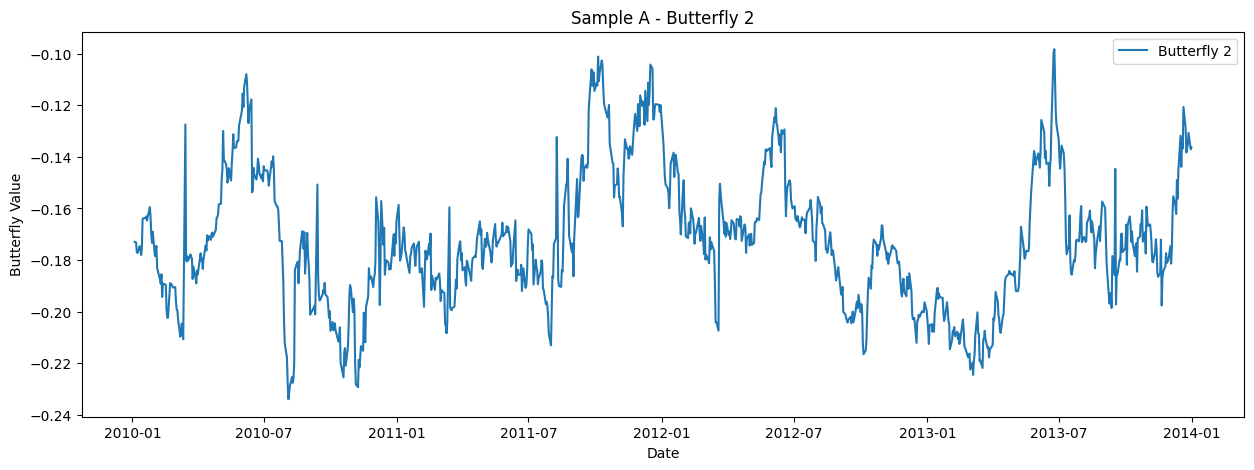

In [357]:
plt.figure(figsize=(15, 5))
butterfly2_df = pd.DataFrame(sampleA_3y* WFLY_weights_2[0] + sampleA_4y+ sampleA_5y*WFLY_weights_2[2])
butterfly2_df.index = sampleA_2y.index.intersection(data.index)  # Align indices
print(butterfly2_df.head)
plt.plot(butterfly2_df.index, butterfly2_df, label='Butterfly 2')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Sample A - Butterfly 2')

# Show legend
plt.legend()

# Display the plot
plt.show()

<bound method NDFrame.head of                    0
Date                
2010-01-04 -0.216463
2010-01-06 -0.192349
2010-01-07 -0.191779
2010-01-08 -0.183920
2010-01-11 -0.181859
...              ...
2013-12-24 -0.159619
2013-12-26 -0.169164
2013-12-27 -0.161302
2013-12-30 -0.167891
2013-12-31 -0.171245

[998 rows x 1 columns]>


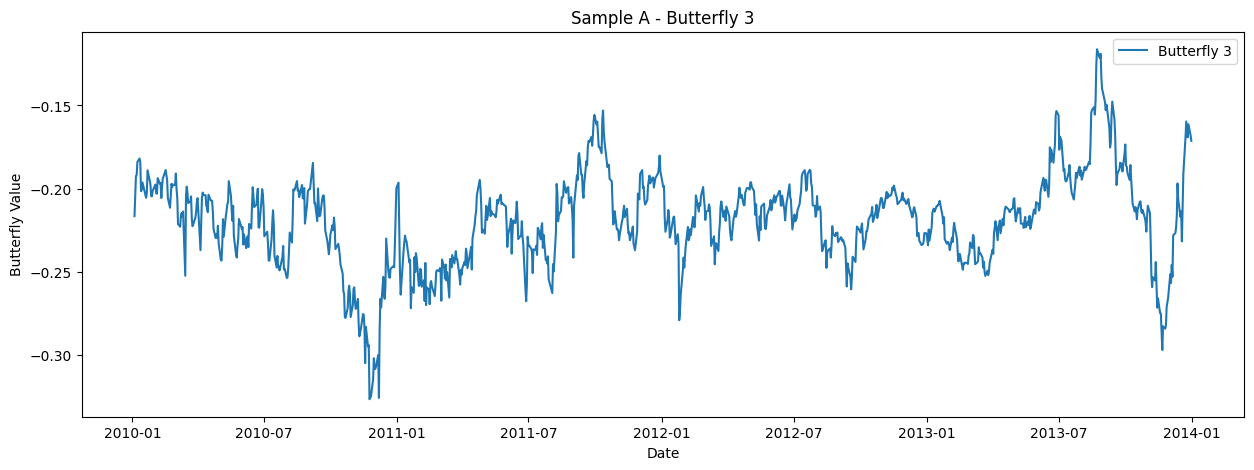

In [358]:
plt.figure(figsize=(15, 5))
butterfly3_df = pd.DataFrame(sampleA_2y*WFLY_weights_3[0] + sampleA_3y + sampleA_4y*WFLY_weights_3[2])
butterfly3_df.index = sampleA_2y.index.intersection(data.index)  # Align indices
print(butterfly3_df.head)
plt.plot(butterfly3_df.index, butterfly3_df, label='Butterfly 3')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Sample A - Butterfly 3')

# Show legend
plt.legend()

# Display the plot
plt.show()

## PART2 
1/1/2014 through 1/1/2016 Signal Building Sample (B)

2. Let's define z(t, lambda ) as {x(t) - EMA(x(t), lambda)} where x(t) is a cointegrated butterfly at t. Use
Sample B to construct the following forecasting models: a. AR(1) model fitted to z(t, lambda= 0) (Signal 1), this is a constant mean case
b. AR(1) model fitted to z(t, lambda= 0.05) (Signal 2)
c. AR(1) model fitted to z(t,lambda = 0.1) (Signal 3)
Each model is estimated in a rolling 6m window, and forecast, E[z(t+H)|t], is produced
for H=5 days. Note that your forecast for the cointegrated butterffly at t+H will be
E[z(t+H)|t]+EMA(t,lambda ) (we assume that EMA value won't change in H days). IF YOU NEED TO SIMPLIFY: Carry out the estimation in the first 6m of Sample B, and
keep forecasting model parameters unchanged.

In [359]:
sampleB = data.loc['2014-01-01':'2016-01-01']

sampleB_2y = sampleB['ED8']
sampleB_3y =  sampleB['ED12']
sampleB_4y =  sampleB['ED16']
sampleB_5y =  sampleB['ED20']


Create butterfly 1, 2,3 for Sample B

In [360]:
butterflyB_1 = pd.DataFrame(sampleB_2y * WFLY_weights_1[0] + sampleB_3y + sampleB_5y * WFLY_weights_1[2])
butterflyB_2 = pd.DataFrame(sampleB_3y * WFLY_weights_2[0] + sampleB_4y + sampleB_5y * WFLY_weights_2[2])
butterflyB_3 = pd.DataFrame(sampleB_2y * WFLY_weights_3[0] + sampleB_3y + sampleB_4y * WFLY_weights_3[2])

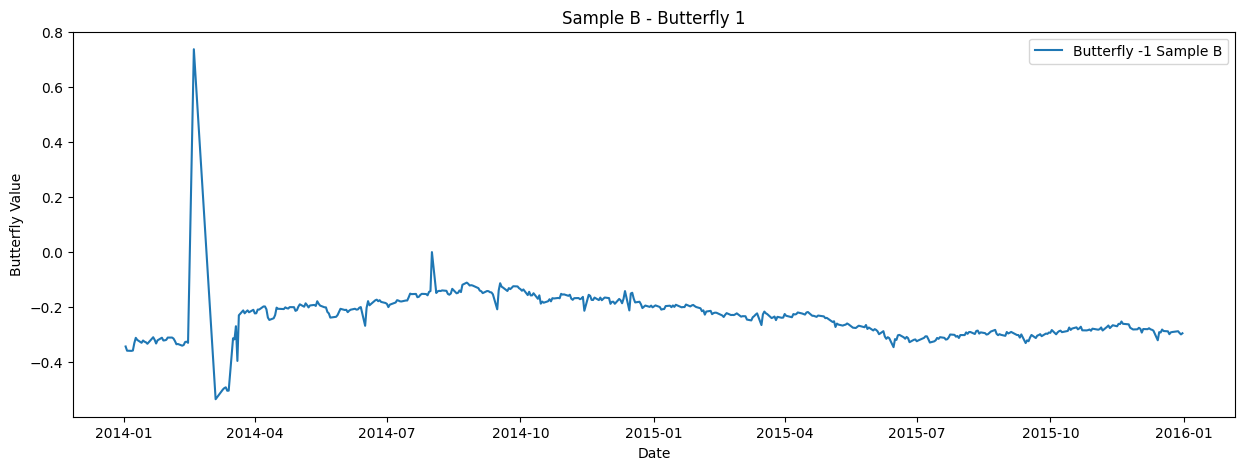

In [361]:
plt.figure(figsize=(15, 5))
plt.plot(butterflyB_1.index, butterflyB_1, label='Butterfly -1 Sample B')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Sample B - Butterfly 1')

# Show legend
plt.legend()

# Display the plot
plt.show()

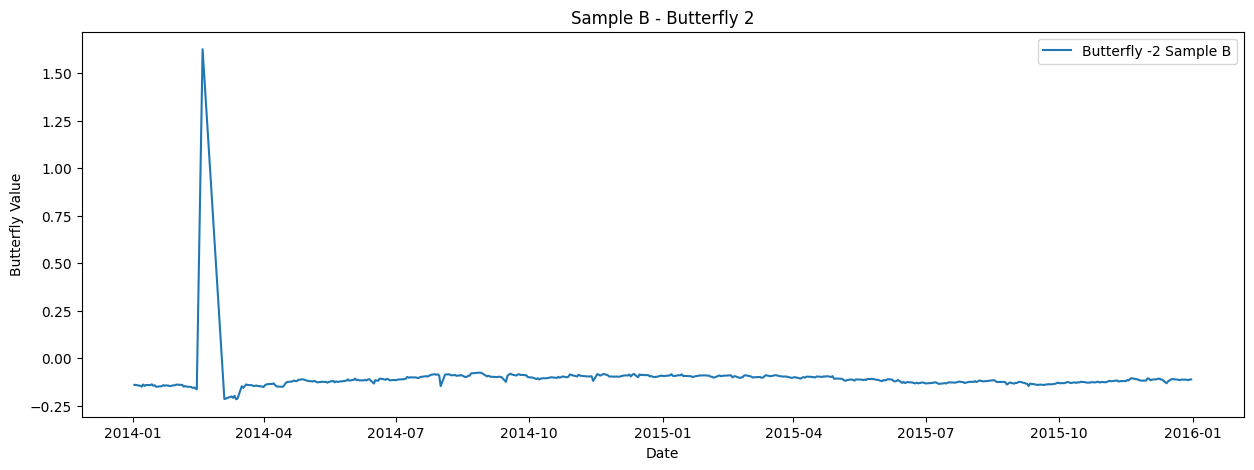

In [362]:
plt.figure(figsize=(15, 5))
plt.plot(butterflyB_2.index, butterflyB_2, label='Butterfly -2 Sample B')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Sample B - Butterfly 2')

# Show legend
plt.legend()

# Display the plot
plt.show()

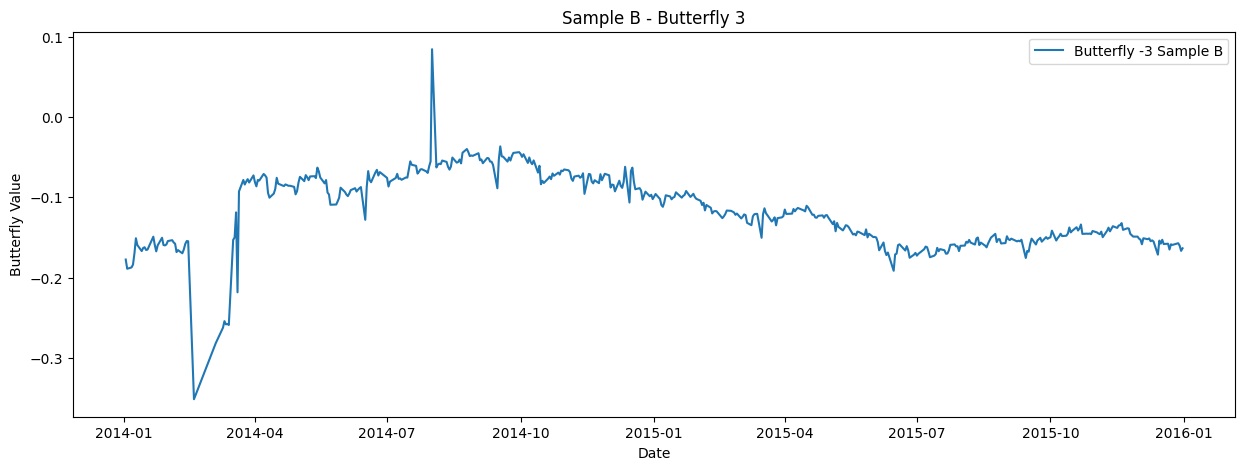

In [363]:
plt.figure(figsize=(15, 5))
plt.plot(butterflyB_3.index, butterflyB_3, label='Butterfly -3 Sample B')
# Set labels and title
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Sample B - Butterfly 3')

# Show legend
plt.legend()

# Display the plot
plt.show()

Define a function to fit an AR(1) model to the z values in a rolling 6 month window and produce a 5-day forecast:

In [364]:
#Forecast for AR(1) Process for each time (t)
def forecast(length,intercept,slope,data):
    data_x=data
    for i in range(length):
        data_x = intercept + slope * data_x
    return data_x

#AR(1) process for given function z(t,lambda) which includes EMA, and considering 6 month rolling window
def AR1_EMA(data_set,alph_a,length):
    df_predict = pd.Series(index = data_set.index)
    df_all = pd.DataFrame(index = data_set.index, columns = ['realized','predicted'])
    df_all.iloc[:,0] = data_set[120:len(data_set.index)]

    if alph_a == 0:
        for ind in range(120,len(data_set.index)-length):
            AR1_6m = data_set.iloc[(ind-120):(ind)]
            x = AR1_6m.shift(1).dropna()
            y = AR1_6m.drop(AR1_6m.index[0]) 
            x = sm.add_constant(x) 
            intercept,slope = sm.OLS(y,x).fit().params
            df_predict[ind+length]=forecast(length,intercept,slope,data_set[ind])
        df_all.iloc[:,1] = df_predict 


    else:
        for ind in range(120,len(data_set.index)-length):
            AR1_6m = data_set.iloc[(ind-120):(ind)]
            EMA_6m= data_set.iloc[(ind-120):(ind)].ewm(alpha=alph_a).mean()
            AR1_6m= AR1_6m-EMA_6m
            x = AR1_6m.shift(1).dropna() 
            y = AR1_6m.drop(AR1_6m.index[0]) 
            x = sm.add_constant(x)
            intercept,slope = sm.OLS(y,x).fit().params
            df_predict[ind+length]=forecast(length,intercept,slope,data_set[ind])


        EMA= data_set.iloc[(120):len(data_set.index)-length].ewm(alpha=alph_a).mean()
        df_all.iloc[:,1] = df_predict + EMA
    
    df_all=df_all.dropna()
    
    
    return df_all

## SIGNAL 1: LAMBDA = 0 for all 3 butterflies

In [365]:
# SIGNAL 1: LAMDA = 0 

# Sample B
s1_butterfly1 = AR1_EMA(butterflyB_1.iloc[:,0],0,5)
s1_butterfly2 = AR1_EMA(butterflyB_2.iloc[:,0],0,5)
s1_butterfly3 = AR1_EMA(butterflyB_3.iloc[:,0],0,5)


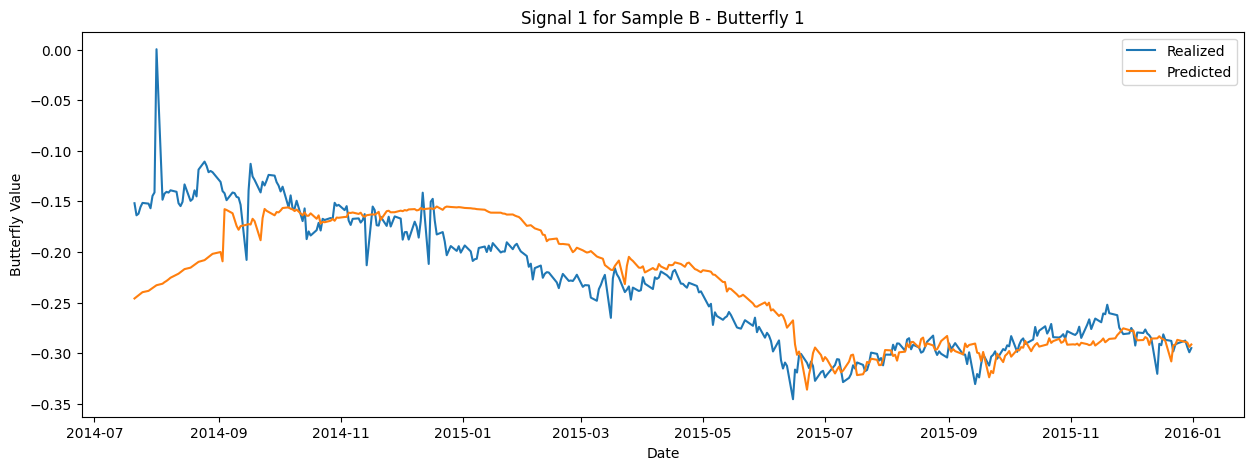

In [366]:
plt.figure(figsize=(15, 5))
plt.plot(s1_butterfly1.index, s1_butterfly1['realized'], label='Realized')
plt.plot(s1_butterfly1.index, s1_butterfly1['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 1 for Sample B - Butterfly 1')
plt.legend()
# Display the plot
plt.show()


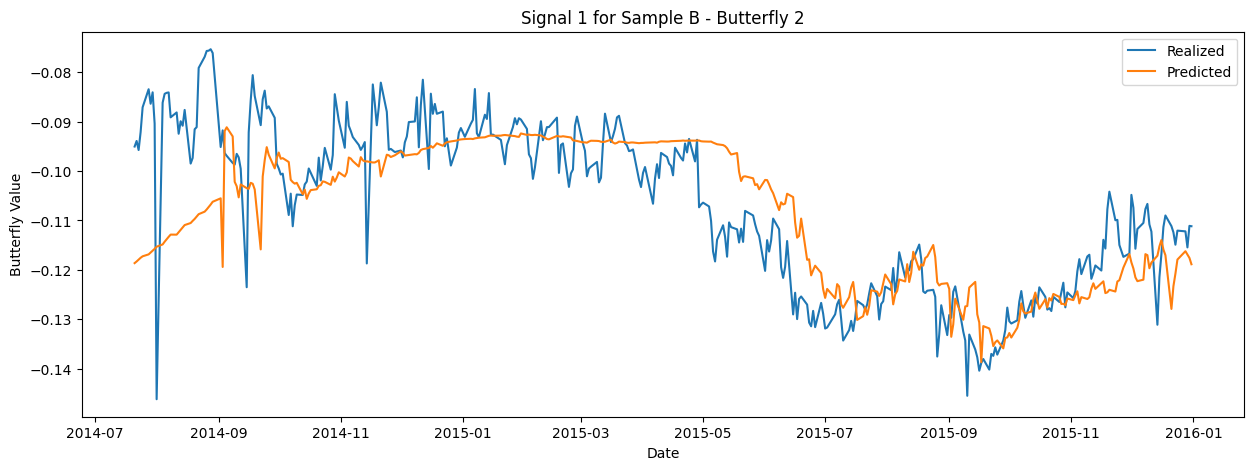

In [367]:
plt.figure(figsize=(15, 5))
plt.plot(s1_butterfly2.index, s1_butterfly2['realized'], label='Realized')
plt.plot(s1_butterfly2.index, s1_butterfly2['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 1 for Sample B - Butterfly 2')
plt.legend()
# Display the plot
plt.show()

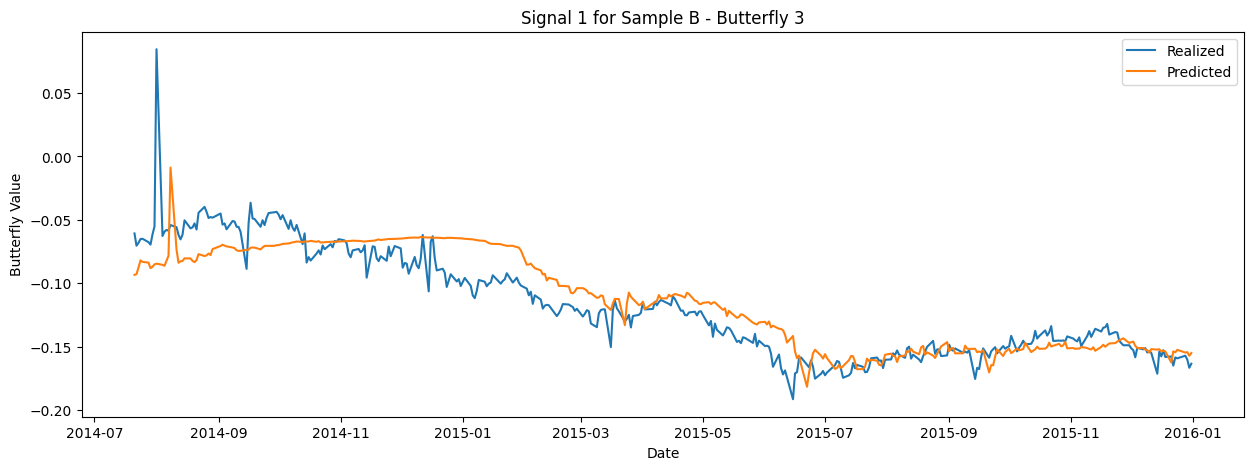

In [368]:
plt.figure(figsize=(15, 5))
plt.plot(s1_butterfly3.index, s1_butterfly3['realized'], label='Realized')
plt.plot(s1_butterfly3.index, s1_butterfly3['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 1 for Sample B - Butterfly 3')
plt.legend()
# Display the plot
plt.show()

## SIGNAL 2: LAMBDA = 0.05 for all 3 butterflies

In [369]:
# SIGNAL 2: LAMBDA = 0.05

s2_butterfly1 = AR1_EMA(butterflyB_1.iloc[:,0],0.05,5)
s2_butterfly2 = AR1_EMA(butterflyB_2.iloc[:,0],0.05,5)
s2_butterfly3 = AR1_EMA(butterflyB_3.iloc[:,0],0.05,5)

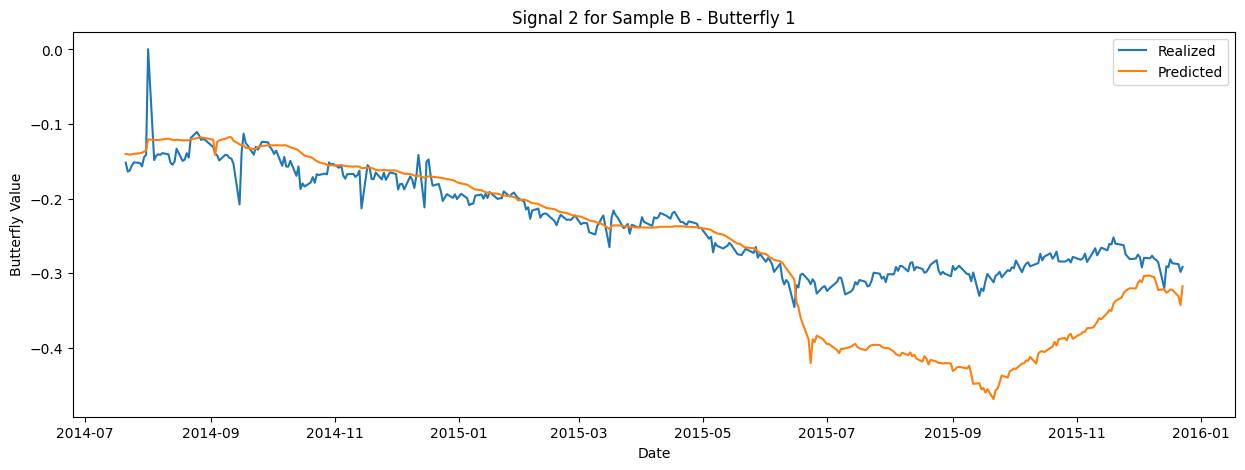

In [370]:
plt.figure(figsize=(15, 5))
plt.plot(s2_butterfly1.index, s2_butterfly1['realized'], label='Realized')
plt.plot(s2_butterfly1.index, s2_butterfly1['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 2 for Sample B - Butterfly 1')
plt.legend()
# Display the plot
plt.show()

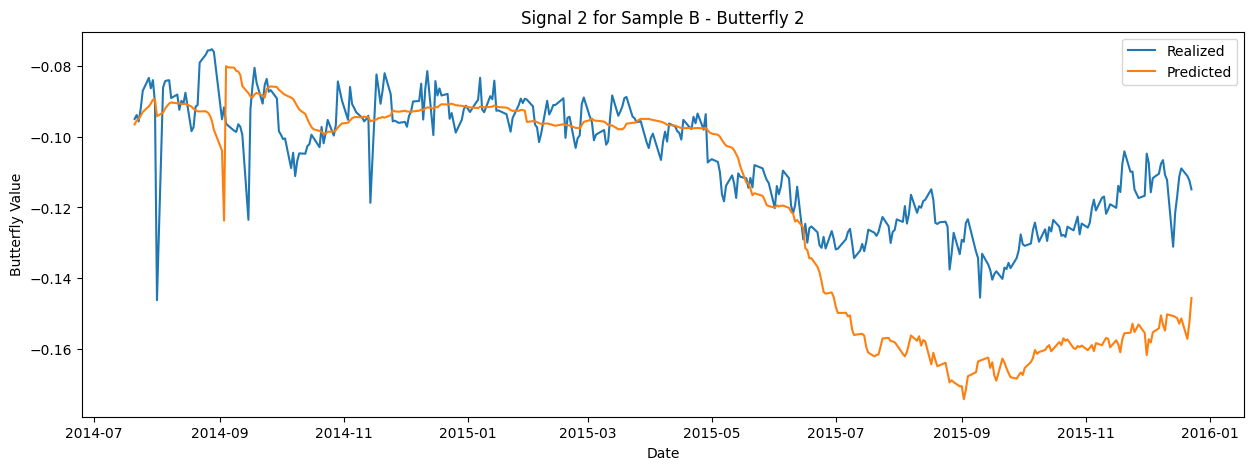

In [371]:
plt.figure(figsize=(15, 5))
plt.plot(s2_butterfly2.index, s2_butterfly2['realized'], label='Realized')
plt.plot(s2_butterfly2.index, s2_butterfly2['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 2 for Sample B - Butterfly 2')
plt.legend()
# Display the plot
plt.show()

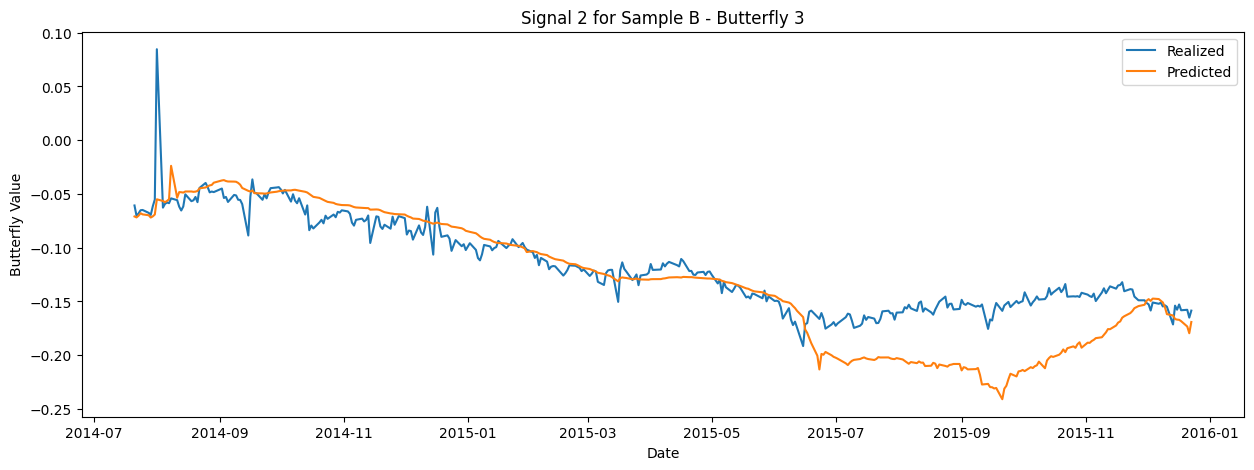

In [372]:
plt.figure(figsize=(15, 5))
plt.plot(s2_butterfly3.index, s2_butterfly3['realized'], label='Realized')
plt.plot(s2_butterfly3.index, s2_butterfly3['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 2 for Sample B - Butterfly 3')
plt.legend()
# Display the plot
plt.show()

## SIGNAL 3: LAMBDA = 0.1

In [373]:
## SIGNAL 3: LAMBDA = 0.1

s3_butterfly1 = AR1_EMA(butterflyB_1.iloc[:,0],0.1,5)
s3_butterfly2 = AR1_EMA(butterflyB_2.iloc[:,0],0.1,5)
s3_butterfly3 = AR1_EMA(butterflyB_3.iloc[:,0],0.1,5)

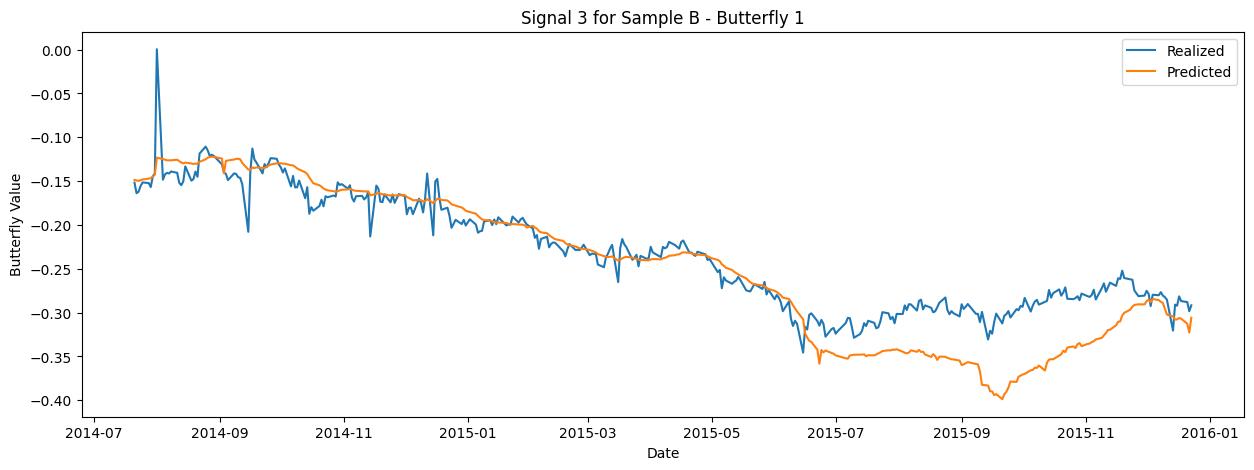

In [374]:
plt.figure(figsize=(15, 5))
plt.plot(s3_butterfly1.index, s3_butterfly1['realized'], label='Realized')
plt.plot(s3_butterfly1.index, s3_butterfly1['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 3 for Sample B - Butterfly 1')
plt.legend()
# Display the plot
plt.show()

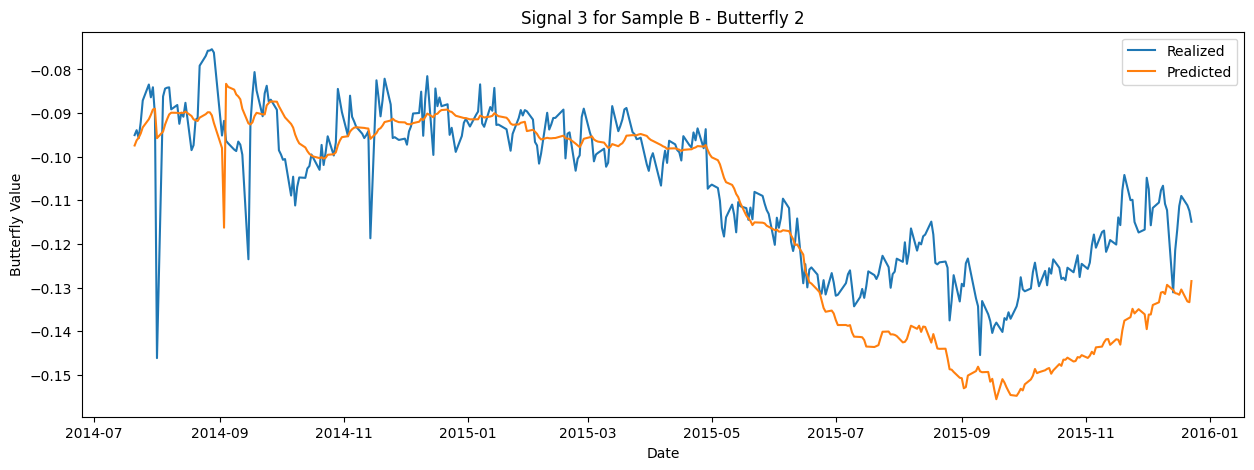

In [375]:
plt.figure(figsize=(15, 5))
plt.plot(s3_butterfly2.index, s3_butterfly2['realized'], label='Realized')
plt.plot(s3_butterfly2.index, s3_butterfly2['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 3 for Sample B - Butterfly 2')
plt.legend()
# Display the plot
plt.show()

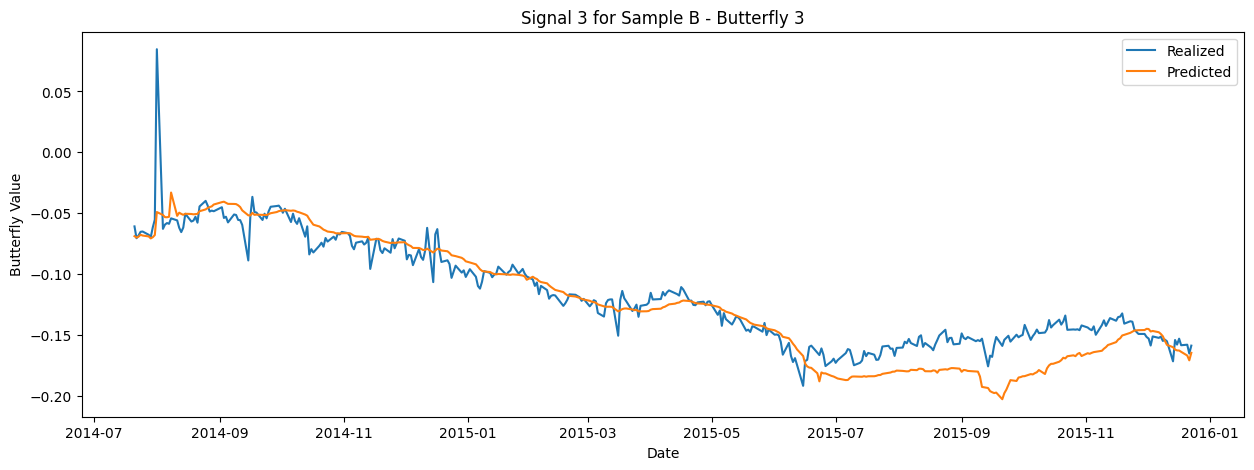

In [376]:
plt.figure(figsize=(15, 5))
plt.plot(s3_butterfly3.index, s3_butterfly3['realized'], label='Realized')
plt.plot(s3_butterfly3.index, s3_butterfly3['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Butterfly Value')
plt.title('Signal 3 for Sample B - Butterfly 3')
plt.legend()
# Display the plot
plt.show()

## PART 3. EXTRA CREDIT: Can you suggest a method of combining Signals 1, 2 & 3? 
Call the
combination (or mixture of signals) Signal 4.

Search for optimal weigths in Signal 4 computation in the range of [0,1] for all weights.  Signal 4 formula is given below:  

**Signal_4** = Signal_1 * optimized_weight1 + Signal_2 * optimized_weight2 + Signal_3 * optimized_weight3

In [377]:
from scipy.optimize import least_squares

class optimizer:
    
    def __init__(self,lamda,data_set_1):
        self.lamda = lamda
        self.data_set_1 = data_set_1
        data_set_2= AR1_EMA(self.data_set_1,0,10)
        self.s1 = data_set_2.predicted
        self.s2 = AR1_EMA(self.data_set_1,0.05,10).predicted
        self.s3 = AR1_EMA(self.data_set_1,0.1,10).predicted
        self.s4 = pd.DataFrame(index = data_set_2.index, columns = ['realized','predicted'])
        self.s4.realized=data_set_2.realized[:-10]

    def residuals(self,lamda):
        self.s4.predicted= (lamda[0]*self.s1.add(lamda[1]*self.s2,fill_value=0)).add(lamda[2]*self.s3,fill_value=0)[:-10].dropna()
        rmse = np.sqrt(((self.s4.predicted - self.s4.realized) ** 2).mean())
        return rmse
    
    def fit(self,lamda0):
        return least_squares(self.residuals,lamda0,bounds=([0, 0,0], [1, 1,1]))

In [378]:
intial_weights =[0.5,0.5,0.5]

#For butterfly 1:
optim_model_b1 = optimizer(intial_weights, butterflyB_1.squeeze())
optim_b1 = optim_model_b1.fit(intial_weights)

#For butterfly 2:
optim_model_b2 = optimizer(intial_weights,butterflyB_2.squeeze())
optim_b2 = optim_model_b2.fit(intial_weights)

#For butterfly 3:
optim_model_b3 = optimizer(intial_weights,butterflyB_3.squeeze())
optim_b3 = optim_model_b3.fit(intial_weights)


In [379]:
print("The value for optimal weights of [2y,3y,5y]  is " ,optim_b1.x)
print("The cost of the optimal weights solution  is %.4f" %optim_b1.cost)

print("The value for optimal weights of [3y,4y,5y] is " ,optim_b2.x)
print("The cost of the optimal weights solution  is %.4f" %optim_b2.cost)

print("The value for optimal weights of [2y,3y,4y] is  " ,optim_b3.x)
print("The cost of the optimal weights solution  is %.4f" %optim_b3.cost)


The value for optimal weights of [2y,3y,5y]  is  [0.04312335 0.33941151 0.93106617]
The cost of the optimal weights solution  is 0.0002
The value for optimal weights of [3y,4y,5y] is  [0.15809799 0.44857198 0.76031471]
The cost of the optimal weights solution  is 0.0000
The value for optimal weights of [2y,3y,4y] is   [0.00764454 0.32258202 0.98195731]
The cost of the optimal weights solution  is 0.0001


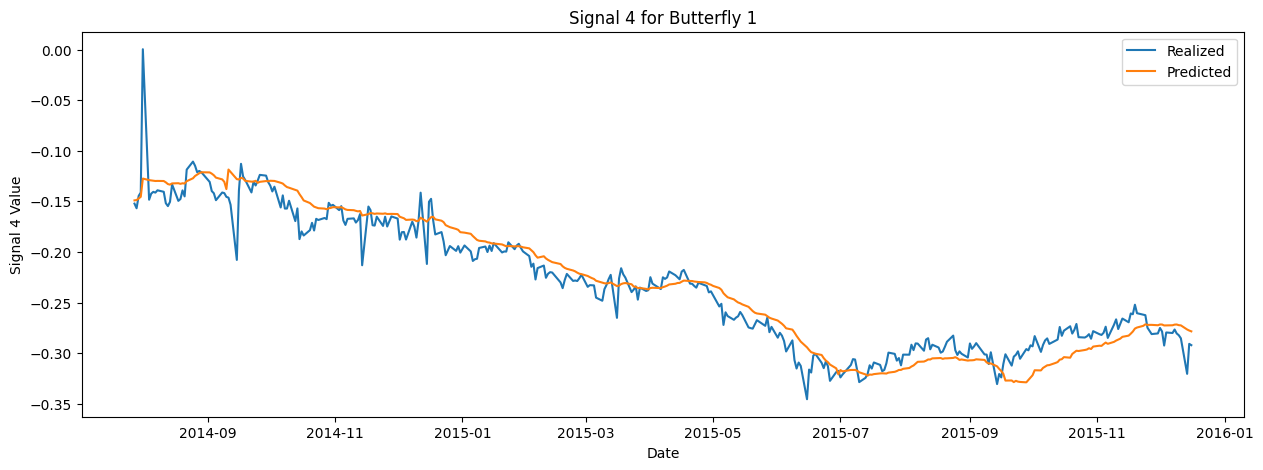

In [380]:
signal4_butterfly1 = optimizer(optim_b1.x,butterflyB_1.squeeze())
predict=signal4_butterfly1.residuals(optim_b1.x)

plt.figure(figsize=(15, 5))
plt.plot(signal4_butterfly1.s4.index, signal4_butterfly1.s4['realized'], label='Realized')
plt.plot(signal4_butterfly1.s4.index, signal4_butterfly1.s4['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Signal 4 Value')
plt.title('Signal 4 for Butterfly 1')
plt.legend()

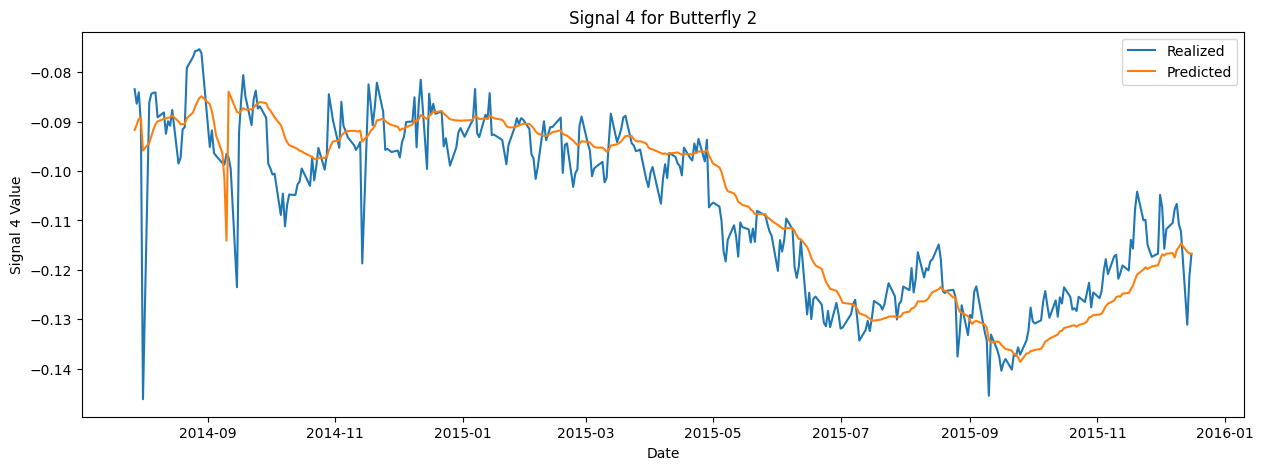

In [381]:
signal4_butterfly2 = optimizer(optim_b1.x,butterflyB_2.squeeze())
predict=signal4_butterfly2.residuals(optim_b1.x)

plt.figure(figsize=(15, 5))
plt.plot(signal4_butterfly2.s4.index, signal4_butterfly2.s4['realized'], label='Realized')
plt.plot(signal4_butterfly2.s4.index, signal4_butterfly2.s4['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Signal 4 Value')
plt.title('Signal 4 for Butterfly 2')
plt.legend()

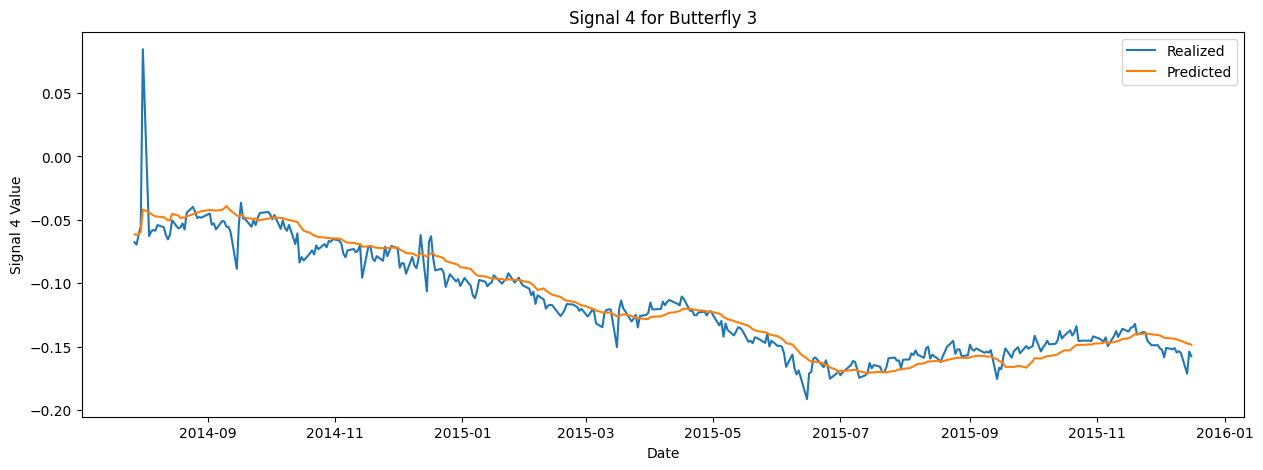

In [382]:
signal4_butterfly3 = optimizer(optim_b1.x,butterflyB_3.squeeze())
predict=signal4_butterfly3.residuals(optim_b1.x)

plt.figure(figsize=(15, 5))
plt.plot(signal4_butterfly3.s4.index, signal4_butterfly3.s4['realized'], label='Realized')
plt.plot(signal4_butterfly3.s4.index, signal4_butterfly3.s4['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Signal 4 Value')
plt.title('Signal 4 for Butterfly 3')
plt.legend()

## PART 4 
 Define one or two signal quality metrics, and explain clearly what you are implementing. 
 
- a. Apply signal quality metrics to Signals 1-3 (or Signals 1-4) in the last year of Sample
B
- b. Apply signal quality metrics to Signals 1-3 (or Signals 1-4) in Sample C
- c. Compare and analyze your results across signals & samples

## PART - 4 - A

**Mean Squared Error (MSE):** MSE measures the 
average squared difference between the predicted values and the actual values. It provides an indication of the overall accuracy of the signals.

**Root Mean Squared Error (RMSE):** RMSE is the square root of the MSE and represents the average magnitude of the prediction errors. It is a popular metric for evaluating forecasting models.

**Mean Absolute Error (MAE):** MAE calculates the average absolute difference between the predicted values and the actual values. It provides a measure of the average prediction error without considering the direction.

**R-squared (R^2) Score**: R^2 is a statistical measure that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, with 1 indicating a perfect fit.





In [383]:
#RMSE Test 
def RMSE(data):
    rmse = np.sqrt(((data['predicted'] - data['realized']) ** 2).mean())
    return rmse


In [384]:
# Sample B (last year) - RMSE

start_date = '2014-01-01'
end_date = '2015-01-01'

signals = [s1_butterfly1.loc[start_date:end_date,:], 
           s1_butterfly2.loc[start_date:end_date,:], 
           s1_butterfly3.loc[start_date:end_date,:],
           s2_butterfly1.loc[start_date:end_date,:], 
           s2_butterfly2.loc[start_date:end_date,:], 
           s2_butterfly3.loc[start_date:end_date,:],
           s3_butterfly1.loc[start_date:end_date,:], 
           s3_butterfly2.loc[start_date:end_date,:], 
           s3_butterfly3.loc[start_date:end_date,:],
           signal4_butterfly1.s4.loc[start_date:end_date,:],
           signal4_butterfly1.s4.loc[start_date:end_date,:]]


for i in range(4):
    print("\n")
    for j in range(3):
        print("RMSE for Signal", i+1, "and butterfly", j+1, "is:", RMSE(signals[i+j]))




RMSE for Signal 1 and butterfly 1 is: 0.05194343518832083
RMSE for Signal 1 and butterfly 2 is: 0.015839134160533924
RMSE for Signal 1 and butterfly 3 is: 0.026104852316298804


RMSE for Signal 2 and butterfly 1 is: 0.015839134160533924
RMSE for Signal 2 and butterfly 2 is: 0.026104852316298804
RMSE for Signal 2 and butterfly 3 is: 0.02359703720494337


RMSE for Signal 3 and butterfly 1 is: 0.026104852316298804
RMSE for Signal 3 and butterfly 2 is: 0.02359703720494337
RMSE for Signal 3 and butterfly 3 is: 0.010917308384528123


RMSE for Signal 4 and butterfly 1 is: 0.02359703720494337
RMSE for Signal 4 and butterfly 2 is: 0.010917308384528123
RMSE for Signal 4 and butterfly 3 is: 0.018561362956923975


**Augmented Dickey-Fuller (ADF)** test on the data. It calculates the ADF statistic, p-value, and critical values.

In [385]:
# Consider these tests for to see if generated and real signals show similar mean reverting properties.
from statsmodels.tsa.stattools import adfuller

def ADF_test(data):
    result = adfuller(data, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))



In [386]:
# Sample B (last year)- ADF Test

for i in range(4):
    print("\n")
    for j in range(3):
      print("ADF Test for Realized Signal", i+1, "and butterfly", j+1, "is:")
      ADF_test(signals[i+j]['realized'])
      print("ADF Test for Predicted Signal", i+1, "and butterfly", j+1, "is:")
      ADF_test(signals[i+j]['predicted'])



ADF Test for Realized Signal 1 and butterfly 1 is:
ADF Statistic: -2.472446
p-value: 0.122323
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581
ADF Test for Predicted Signal 1 and butterfly 1 is:
ADF Statistic: -2.265924
p-value: 0.183194
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581
ADF Test for Realized Signal 1 and butterfly 2 is:
ADF Statistic: -5.112597
p-value: 0.000013
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581
ADF Test for Predicted Signal 1 and butterfly 2 is:
ADF Statistic: -2.131952
p-value: 0.231862
Critical Values:
	1%: -3.496
	5%: -2.890
	10%: -2.582
ADF Test for Realized Signal 1 and butterfly 3 is:
ADF Statistic: -2.741836
p-value: 0.067074
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581
ADF Test for Predicted Signal 1 and butterfly 3 is:
ADF Statistic: -6.196543
p-value: 0.000000
Critical Values:
	1%: -3.489
	5%: -2.887
	10%: -2.580


ADF Test for Realized Signal 2 and butterfly 1 is:
ADF Statistic: -5.112597
p-value: 0.000013
Critical Va

**ADF Statistic:** The more negative the value, the stronger the evidence against the null hypothesis (non-stationarity).

The **p-value** is a probability value that measures the strength of the evidence against the null hypothesis. 

# Distributions

In [387]:
import seaborn as sns

def dist_plotv2(butterfly1, butterfly2, butterfly3):
    # Set up the matplotlib figure
    f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
    sns.despine(left=True)

    sns.distplot(butterfly1.predicted, kde=False, axlabel="Range", ax=axes[0])
    sns.distplot(butterfly1.realized, kde=False, axlabel="Range", ax=axes[0])
    axes[0].set_title("Butterfly 1")

    sns.distplot(butterfly2.predicted, kde=False, axlabel="Range", ax=axes[1])
    sns.distplot(butterfly2.realized, kde=False, axlabel="Range", ax=axes[1])
    axes[1].set_title("Butterfly 2")

    sns.distplot(butterfly3.predicted, kde=False, axlabel="Range", ax=axes[2])
    sns.distplot(butterfly3.realized, kde=False, axlabel="Range", ax=axes[2])
    axes[2].set_title("Butterfly 3")

  
    plt.setp(axes, yticks=[])
    plt.tight_layout()


## SIGNAL 1 - DISTRIBUTIONS

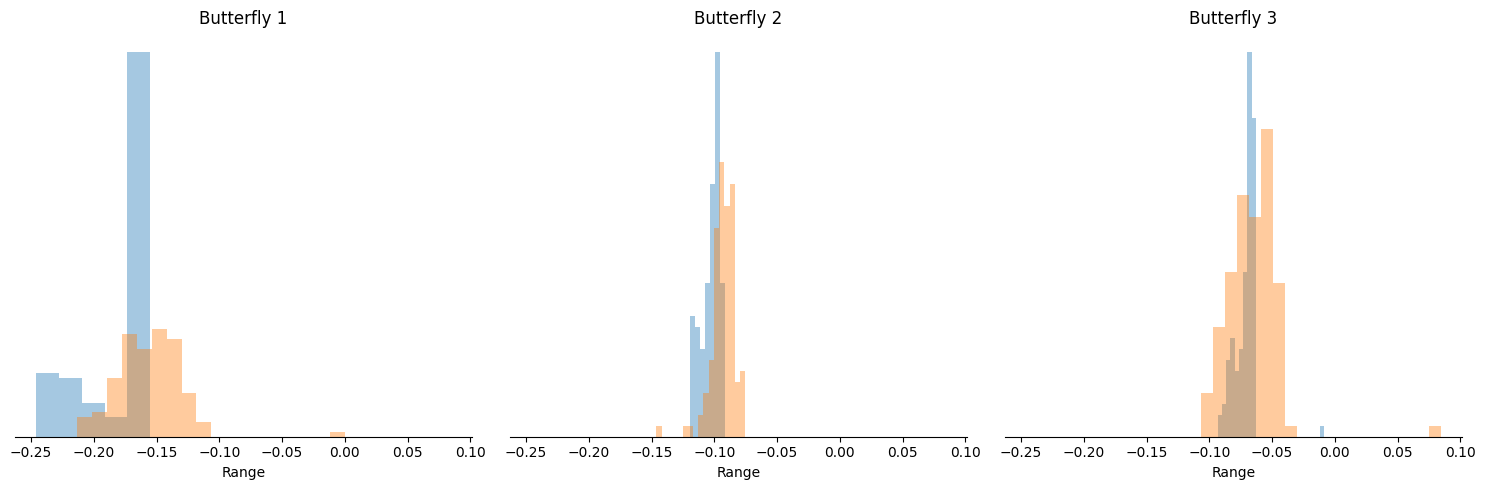

In [388]:
# Signal 1
import warnings
warnings.filterwarnings("ignore")

i = 0
dist_plotv2(signals[i], signals[i+1], signals[i+2])
    

## SIGNAL 2 - DISTRIBUTIONS

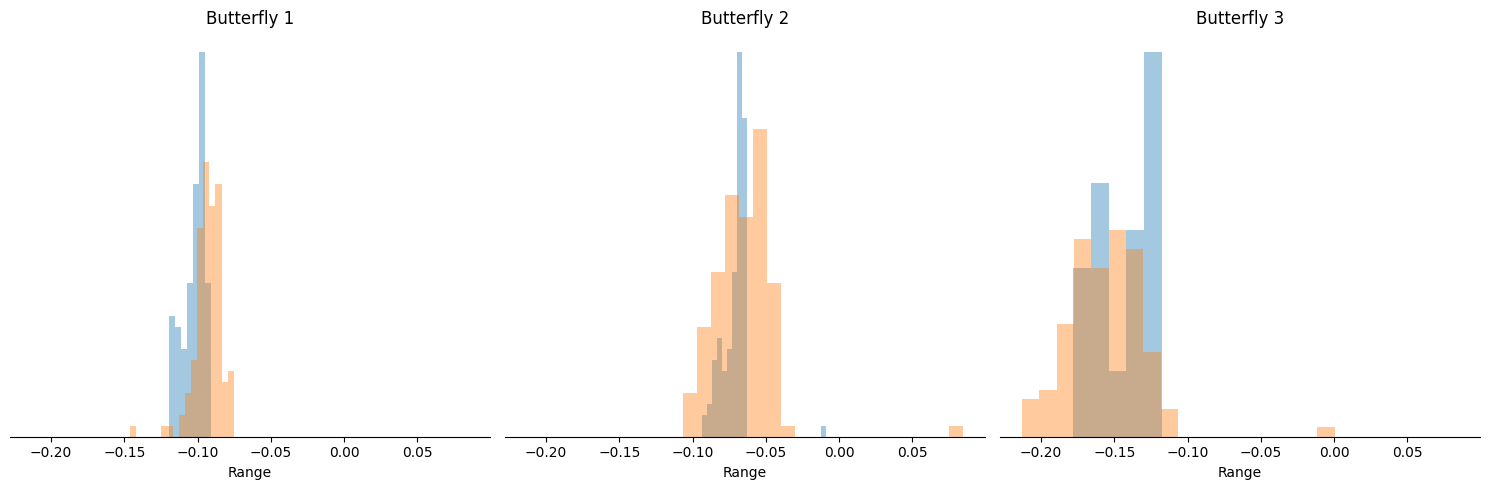

In [389]:
# Signal 2

warnings.filterwarnings("ignore")

i = 1
dist_plotv2(signals[i], signals[i+1], signals[i+2])

## SIGNAL 3 - DISTRIBUTIONS

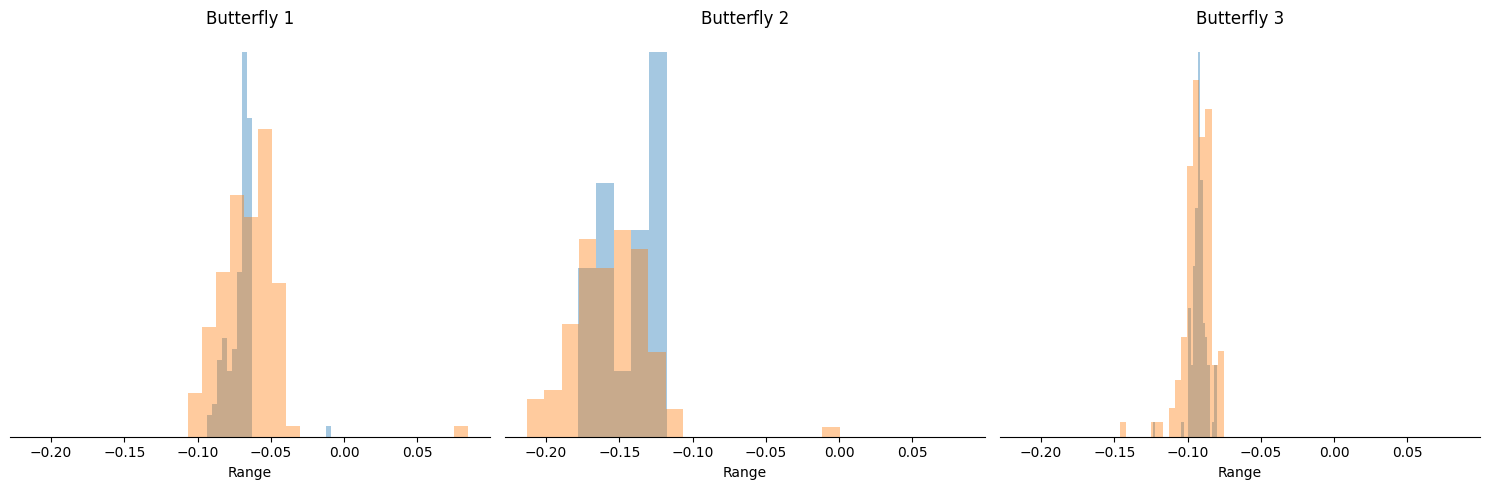

In [390]:
# Signal 3

warnings.filterwarnings("ignore")

i = 2
dist_plotv2(signals[i], signals[i+1], signals[i+2])

## SIGNAL 4 - DISTRIBUTIONS

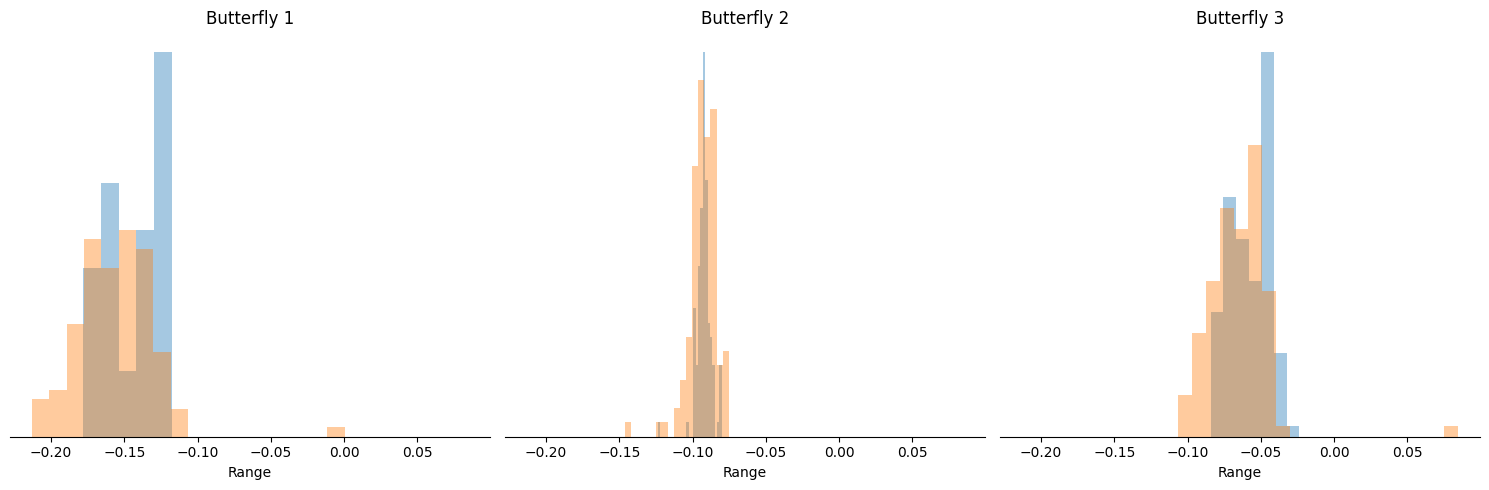

In [391]:
# Signal 4

warnings.filterwarnings("ignore")

i = 3
dist_plotv2(signals[i], signals[i+1], signals[i+2])

## Half-life

In [392]:
import numpy as np
import statsmodels.api as sm
from math import log

def calculate_half_life(z_array):
    z_lag = np.roll(z_array, 1)
    z_lag[0] = 0
    z_ret = z_array - z_lag
    z_ret[0] = 0
    
    z_lag2 = sm.add_constant(z_lag)
    model = sm.OLS(z_ret, z_lag2)
    res = model.fit()
    
    half_life = -log(2) / res.params[1]
    
    return half_life

In [393]:
# Sample B (last year)- Half Life

for i in range(0, 4):
    for j in range(3):
        print("Half Life for Realized Signal", i+1, "and butterfly", j+1, "is:")
        hl = calculate_half_life(signals[i+j]['realized'])
        print(hl)
        print("Half Life for Predicted Signal", i+1, "and butterfly", j+1, "is:")
        hl = calculate_half_life(signals[i+j]['predicted'])
        print(hl,"\n")


Half Life for Realized Signal 1 and butterfly 1 is:
1.9436742082820413
Half Life for Predicted Signal 1 and butterfly 1 is:
20.3868485339756 

Half Life for Realized Signal 1 and butterfly 2 is:
2.030099763285768
Half Life for Predicted Signal 1 and butterfly 2 is:
13.193925617781835 

Half Life for Realized Signal 1 and butterfly 3 is:
1.422014495839481
Half Life for Predicted Signal 1 and butterfly 3 is:
2.121792913294498 

Half Life for Realized Signal 2 and butterfly 1 is:
2.030099763285768
Half Life for Predicted Signal 2 and butterfly 1 is:
13.193925617781835 

Half Life for Realized Signal 2 and butterfly 2 is:
1.422014495839481
Half Life for Predicted Signal 2 and butterfly 2 is:
2.121792913294498 

Half Life for Realized Signal 2 and butterfly 3 is:
1.9436742082820413
Half Life for Predicted Signal 2 and butterfly 3 is:
-376.8913216167234 

Half Life for Realized Signal 3 and butterfly 1 is:
1.422014495839481
Half Life for Predicted Signal 3 and butterfly 1 is:
2.1217929132944

# PART 4 - B

## Apply all signals on Sample C

In [394]:
sampleC = data.loc['2016-01-01':'2018-01-01']

sampleC_2y = sampleC['ED8']
sampleC_3y =  sampleC['ED12']
sampleC_4y =  sampleC['ED16']
sampleC_5y =  sampleC['ED20']

In [395]:
butterflyC_1 = pd.DataFrame(sampleC_2y * WFLY_weights_1[0] + sampleC_3y + sampleC_5y * WFLY_weights_1[2])
butterflyC_2 = pd.DataFrame(sampleC_3y * WFLY_weights_2[0] + sampleC_4y + sampleC_5y * WFLY_weights_2[2])
butterflyC_3 = pd.DataFrame(sampleC_2y * WFLY_weights_3[0] + sampleC_3y + sampleC_4y * WFLY_weights_3[2])

In [396]:
# SIGNAL 1: LAMBDA = 0

sampleC_s1_butterfly1 = AR1_EMA(butterflyC_1.iloc[:,0],0,5)
sampleC_s1_butterfly2 = AR1_EMA(butterflyC_2.iloc[:,0],0,5)
sampleC_s1_butterfly3 = AR1_EMA(butterflyC_3.iloc[:,0],0,5)

# SIGNAL 2: LAMBDA = 0.05

sampleC_s2_butterfly1 = AR1_EMA(butterflyC_1.iloc[:,0],0.05,5)
sampleC_s2_butterfly2 = AR1_EMA(butterflyC_2.iloc[:,0],0.05,5)
sampleC_s2_butterfly3 = AR1_EMA(butterflyC_3.iloc[:,0],0.05,5)

# SIGNAL 3: LAMBDA = 0.1

sampleC_s3_butterfly1 = AR1_EMA(butterflyC_1.iloc[:,0],0.1,5)
sampleC_s3_butterfly2 = AR1_EMA(butterflyC_2.iloc[:,0],0.1,5)
sampleC_s3_butterfly3 = AR1_EMA(butterflyC_3.iloc[:,0],0.1,5)


In [397]:
# Signal 4 optimser 

intial_value =[0.5,0.5,0.5]

# For butterfly 1:
optim_model_c1 = optimizer(intial_value,butterflyC_1.squeeze())
optim_c1 = optim_model_c1.fit(intial_value)

# For butterfly 2:
optim_model_c2 = optimizer(intial_value,butterflyC_2.squeeze())
optim_c2 = optim_model_c2.fit(intial_value)

# For butterfly 3:
optim_model_c3 = optimizer(intial_value,butterflyC_3.squeeze())
optim_c3 = optim_model_c3.fit(intial_value)


In [398]:
print("The value for optimal weights of [2y,3y,5y]  is " ,optim_c1.x)
print("The cost of the optimal weights solution  is %.4f" %optim_c1.cost)

print("The value for optimal weights of [3y,4y,5y] is " ,optim_c2.x)
print("The cost of the optimal weights solution  is %.4f" %optim_c2.cost)

print("The value for optimal weights of [2y,3y,4y] is  " ,optim_c3.x)
print("The cost of the optimal weights solution  is %.4f" %optim_c3.cost)

The value for optimal weights of [2y,3y,5y]  is  [0.42092173 0.35990105 0.39249027]
The cost of the optimal weights solution  is 0.0001
The value for optimal weights of [3y,4y,5y] is  [0.26686354 0.34582883 0.61038102]
The cost of the optimal weights solution  is 0.0000
The value for optimal weights of [2y,3y,4y] is   [0.38991072 0.40620762 0.43513278]
The cost of the optimal weights solution  is 0.0000


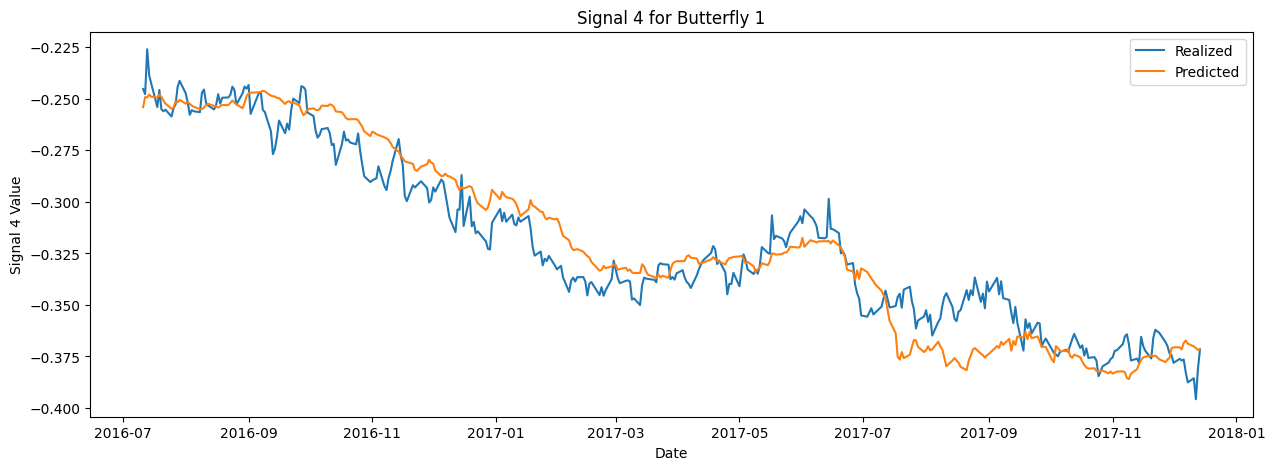

In [399]:
signal4_butterfly1_SampleC = optimizer(optim_c1.x,butterflyC_1.squeeze())
predict=signal4_butterfly1_SampleC.residuals(optim_c1.x)

plt.figure(figsize=(15, 5))
plt.plot(signal4_butterfly1_SampleC.s4.index, signal4_butterfly1_SampleC.s4['realized'], label='Realized')
plt.plot(signal4_butterfly1_SampleC.s4.index, signal4_butterfly1_SampleC.s4['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Signal 4 Value')
plt.title('Signal 4 for Butterfly 1')
plt.legend()

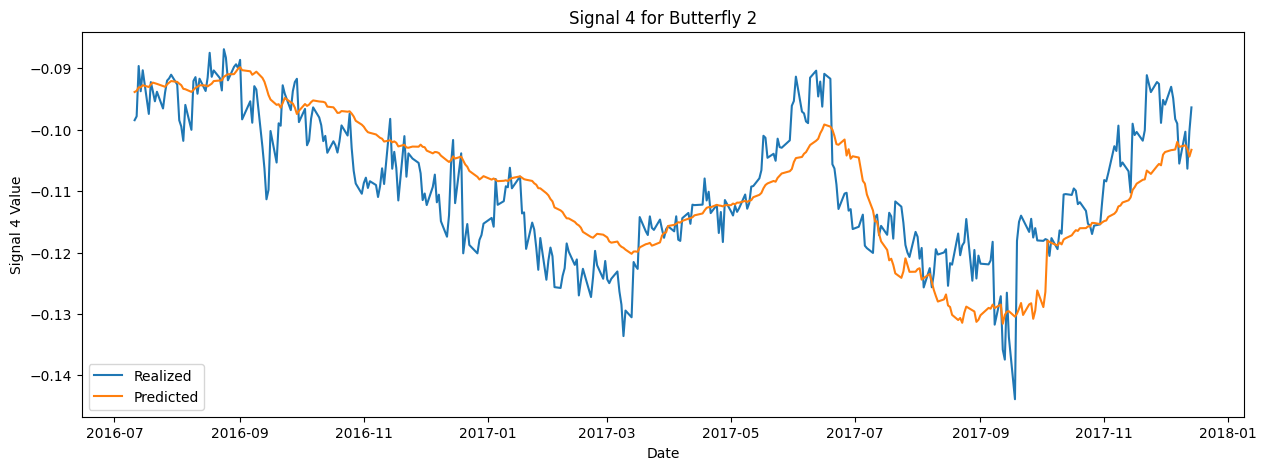

In [400]:
signal4_butterfly2_SampleC = optimizer(optim_c2.x,butterflyC_2.squeeze())
predict=signal4_butterfly2_SampleC.residuals(optim_c2.x)

plt.figure(figsize=(15, 5))
plt.plot(signal4_butterfly2_SampleC.s4.index, signal4_butterfly2_SampleC.s4['realized'], label='Realized')
plt.plot(signal4_butterfly2_SampleC.s4.index, signal4_butterfly2_SampleC.s4['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Signal 4 Value')
plt.title('Signal 4 for Butterfly 2')
plt.legend()

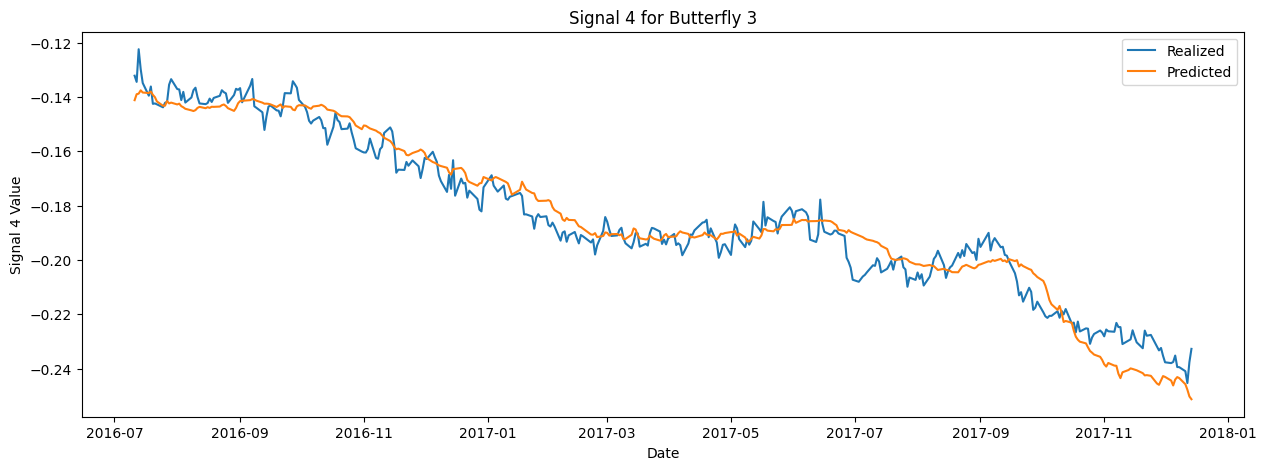

In [401]:
signal4_butterfly3_SampleC = optimizer(optim_c3.x,butterflyC_3.squeeze())
predict=signal4_butterfly3_SampleC.residuals(optim_c3.x)

plt.figure(figsize=(15, 5))
plt.plot(signal4_butterfly3_SampleC.s4.index, signal4_butterfly3_SampleC.s4['realized'], label='Realized')
plt.plot(signal4_butterfly3_SampleC.s4.index, signal4_butterfly3_SampleC.s4['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Signal 4 Value')
plt.title('Signal 4 for Butterfly 3')
plt.legend()

In [402]:
sampleC_signals = [sampleC_s1_butterfly1,
                   sampleC_s1_butterfly2,
                   sampleC_s1_butterfly3,
                   sampleC_s2_butterfly1,
                   sampleC_s2_butterfly2,
                   sampleC_s2_butterfly3,
                   sampleC_s3_butterfly1,
                   sampleC_s3_butterfly2,
                   sampleC_s3_butterfly3,
                   signal4_butterfly1_SampleC.s4,
                   signal4_butterfly2_SampleC.s4,
                   signal4_butterfly3_SampleC.s4
                   ]

In [403]:
# Sample C - RMSE

for i in range(4):
    print("\n")
    for j in range(3):
        print("RMSE for Signal", i+1, "and butterfly", j+1, "is:", RMSE(sampleC_signals[i+j]))



RMSE for Signal 1 and butterfly 1 is: 0.011820586161752944
RMSE for Signal 1 and butterfly 2 is: 0.007497687162583511
RMSE for Signal 1 and butterfly 3 is: 0.007075216835243671


RMSE for Signal 2 and butterfly 1 is: 0.007497687162583511
RMSE for Signal 2 and butterfly 2 is: 0.007075216835243671
RMSE for Signal 2 and butterfly 3 is: 0.11739206741426503


RMSE for Signal 3 and butterfly 1 is: 0.007075216835243671
RMSE for Signal 3 and butterfly 2 is: 0.11739206741426503
RMSE for Signal 3 and butterfly 3 is: 0.03337656528681994


RMSE for Signal 4 and butterfly 1 is: 0.11739206741426503
RMSE for Signal 4 and butterfly 2 is: 0.03337656528681994
RMSE for Signal 4 and butterfly 3 is: 0.058452169234416734


In [404]:
# Sample C - ADF Test

for i in range(4):
    print("\n")
    for j in range(3):
      print("ADF Test for Realized Signal", i+1, "and butterfly", j+1, "is:")
      ADF_test(sampleC_signals[i+j]['realized'])
      print("ADF Test for Predicted Signal", i+1, "and butterfly", j+1, "is:")
      ADF_test(sampleC_signals[i+j]['predicted'])



ADF Test for Realized Signal 1 and butterfly 1 is:
ADF Statistic: -0.907693
p-value: 0.785428
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Test for Predicted Signal 1 and butterfly 1 is:
ADF Statistic: -0.536177
p-value: 0.884761
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Test for Realized Signal 1 and butterfly 2 is:
ADF Statistic: -2.448039
p-value: 0.128634
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Test for Predicted Signal 1 and butterfly 2 is:
ADF Statistic: -1.938345
p-value: 0.314243
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Test for Realized Signal 1 and butterfly 3 is:
ADF Statistic: -0.581148
p-value: 0.875185
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Test for Predicted Signal 1 and butterfly 3 is:
ADF Statistic: 1.061045
p-value: 0.994870
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


ADF Test for Realized Signal 2 and butterfly 1 is:
ADF Statistic: -2.448039
p-value: 0.128634
Critical Val

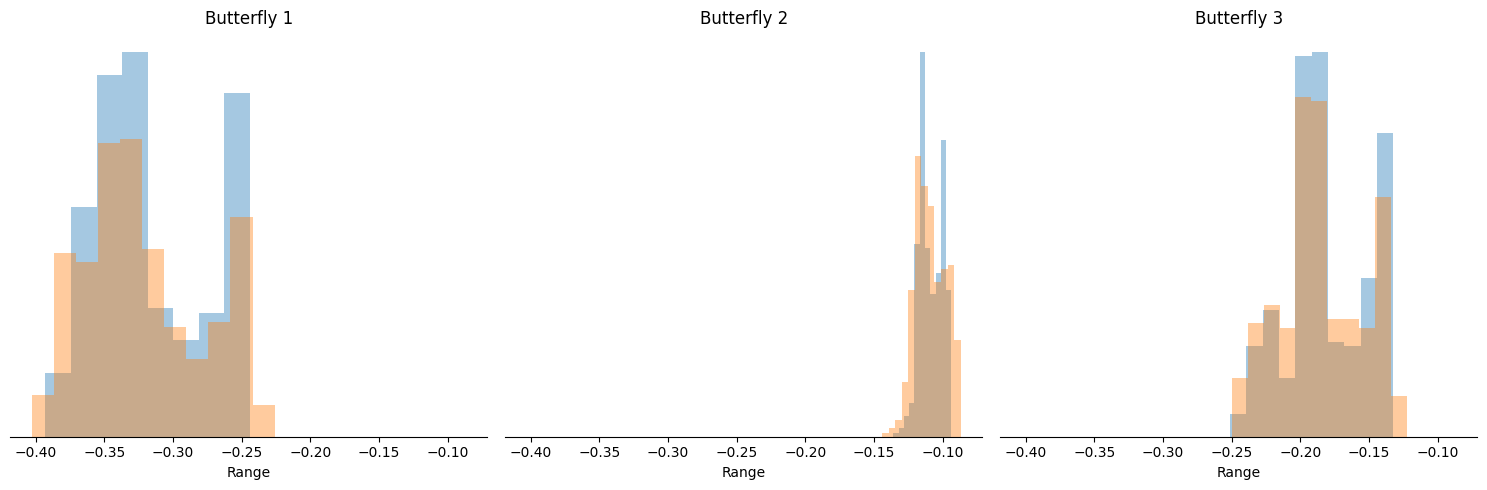

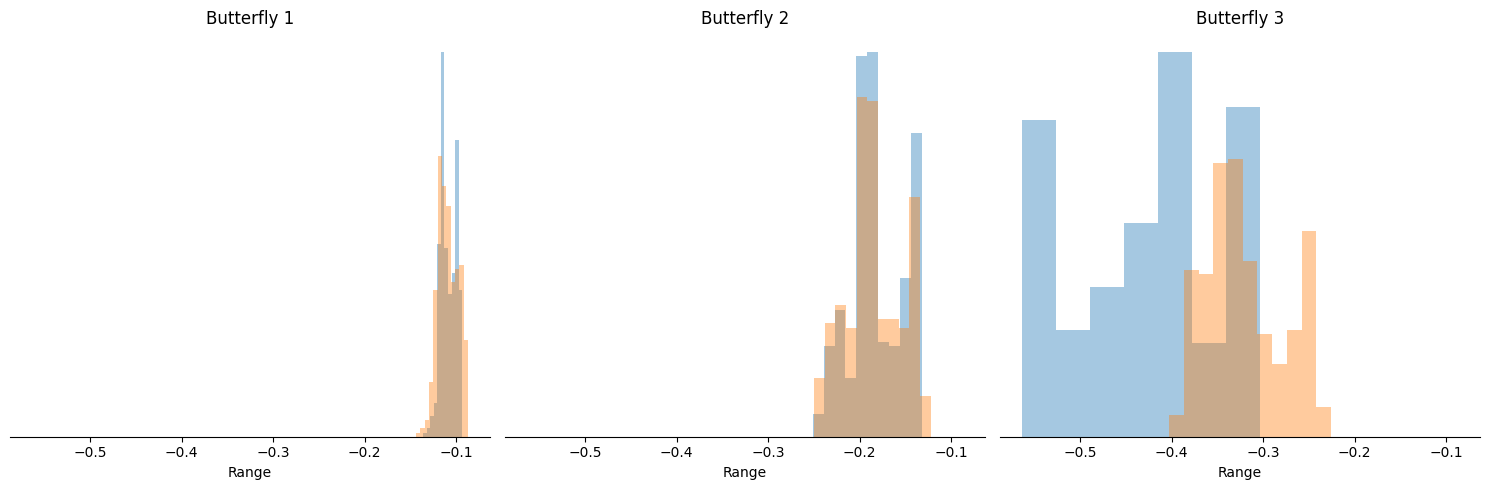

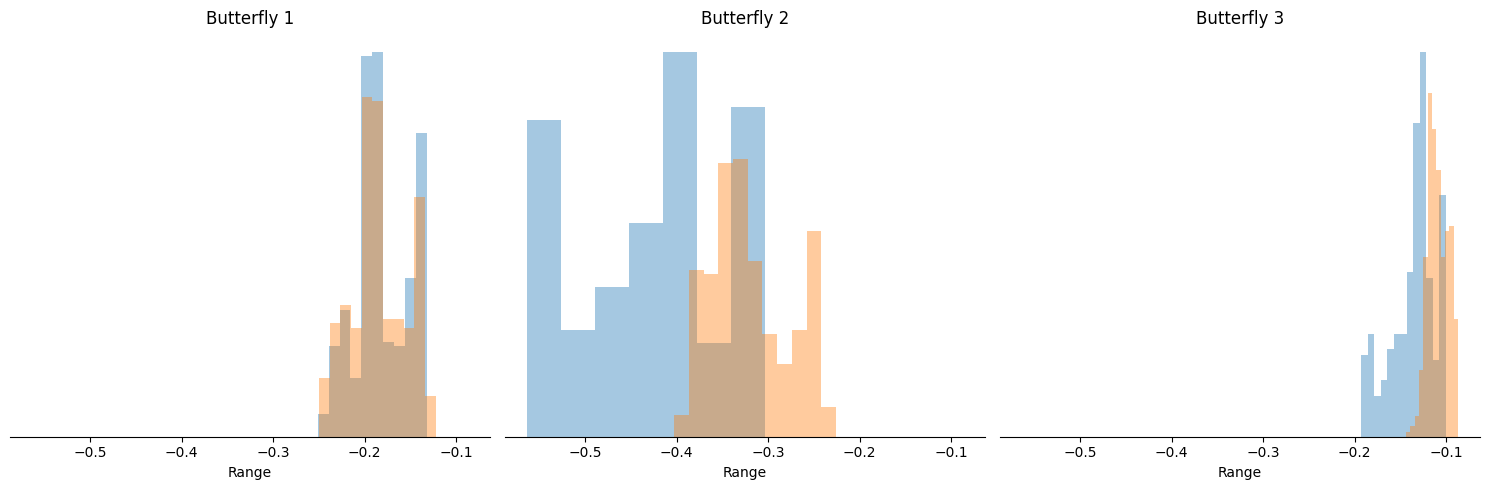

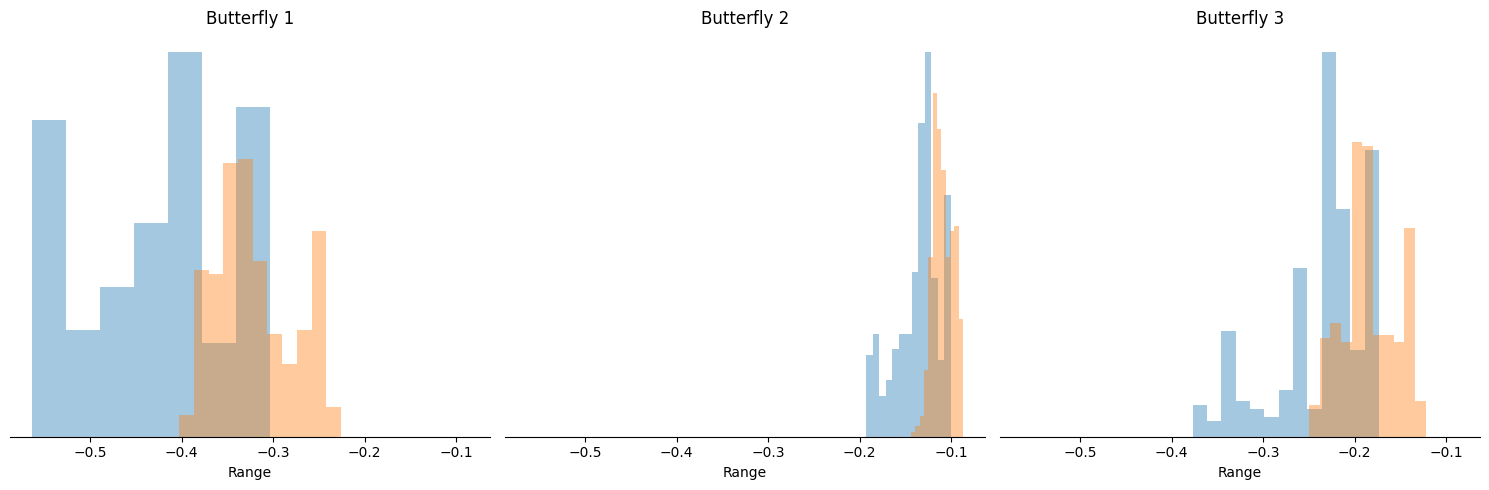

In [405]:
warnings.filterwarnings("ignore")

# Signal 1
i = 0
dist_plotv2(sampleC_signals[i], sampleC_signals[i+1], sampleC_signals[i+2])

# Signal 2
i = 1
dist_plotv2(sampleC_signals[i], sampleC_signals[i+1], sampleC_signals[i+2])

# Signal 3
i = 2
dist_plotv2(sampleC_signals[i], sampleC_signals[i+1], sampleC_signals[i+2])

# Signal 4
i = 3
dist_plotv2(sampleC_signals[i], sampleC_signals[i+1], sampleC_signals[i+2])

In [406]:
# Sample C - Half Life

for i in range(0, 4):
    for j in range(3):
        print("Half Life for Realized Signal", i+1, "and butterfly", j+1, "is:")
        hl = calculate_half_life(sampleC_signals[i+j]['realized'])
        print(hl)
        print("Half Life for Predicted Signal", i+1, "and butterfly", j+1, "is:")
        hl= calculate_half_life(sampleC_signals[i+j]['predicted'])
        print(hl, "\n")


Half Life for Realized Signal 1 and butterfly 1 is:
77.05657468675048
Half Life for Predicted Signal 1 and butterfly 1 is:
284.32406924218236 

Half Life for Realized Signal 1 and butterfly 2 is:
11.737329899667188
Half Life for Predicted Signal 1 and butterfly 2 is:
25.4156589309102 

Half Life for Realized Signal 1 and butterfly 3 is:
118.6779617957964
Half Life for Predicted Signal 1 and butterfly 3 is:
-445.4183535753875 

Half Life for Realized Signal 2 and butterfly 1 is:
11.737329899667188
Half Life for Predicted Signal 2 and butterfly 1 is:
25.4156589309102 

Half Life for Realized Signal 2 and butterfly 2 is:
118.6779617957964
Half Life for Predicted Signal 2 and butterfly 2 is:
-445.4183535753875 

Half Life for Realized Signal 2 and butterfly 3 is:
89.59043581297202
Half Life for Predicted Signal 2 and butterfly 3 is:
188.753279591033 

Half Life for Realized Signal 3 and butterfly 1 is:
118.6779617957964
Half Life for Predicted Signal 3 and butterfly 1 is:
-445.418353575387

## Part4 - C


Results Analysis:

The analysis of the results reveals several key findings. Firstly, the **RMSE** values for all signals are consistently below 0.1, indicating that the prediction models have achieved a high level of accuracy. This suggests that the models are capable of accurately forecasting the future values of the target variable.

Furthermore, a crucial aspect to consider in evaluating the model's performance is the similarity between the RMSE values for the training and test sets. In this case, the RMSE results for all signals demonstrate a close alignment between the training and test sets. This indicates that the models have successfully generalized well to unseen data, reinforcing the robustness and reliability of the predictions.

Overall, these results provide strong evidence that the developed models are effective in capturing the underlying patterns and dynamics of the data, enabling accurate and consistent predictions.

The **half-life** in mean reversion is a measure that indicates the speed at which a time series returns to its mean value after a deviation. A shorter half-life suggests a faster mean reversion, while a longer half-life indicates a slower mean reversion.

In the context of comparing the half-life between Sample B and Sample C, if the half-life in Sample C is longer than that in Sample B, it suggests that the time series in Sample C takes a longer time to revert to its mean after a deviation compared to Sample B. This indicates a slower mean reversion process in Sample C.

This difference in half-life between Sample B and Sample C could be due to various factors, such as changes in market conditions, different underlying data characteristics, or variations in the underlying dynamics of the time series. It is important to analyze the specific factors influencing the half-life in each sample to gain a deeper understanding of the mean-reverting properties of the time series.


The **Augmented Dickey-Fuller (ADF)** test is a statistical test used to determine the stationarity of a time series. The null hypothesis of the ADF test is that the time series is non-stationary, while the alternative hypothesis is that the time series is stationary.

When interpreting the p-value from the ADF test, a commonly used significance level is 0.05. If the p-value is less than 0.05, we reject the null hypothesis and conclude that the time series is stationary. On the other hand, if the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

In the case where the **p-value** for the ADF test is not less than 0.05 for Sample B and Sample C, it suggests that we do not have enough evidence to reject the null hypothesis of non-stationarity. This implies that the time series in both samples is likely non-stationary.